
<font style="font-size:36pt">DBSCAN

<font style="font-size:xx-large">Density Based Spatial Clustering and Noise

<ul style="font-size:xx-large">
<li> For any point $p$ define a neighborhood of $N_\epsilon(p)$ of radius $\epsilon$ centered at $p$<br>
<li> We say $p$ is a <span style="color:red">core point</span> if there are more than $N$ points in $N_\epsilon$<br><br>
    <li> $p$ is <span style="color:red">directly density reachable</span> from a core point $q$ if $p\in N_\epsilon(q)$.<br><br>
    <li>$p$ is <span style="color:red">density reachable</span> from $q$ if there is a sequence of points $p_1, p_2, \dots, q$ that are sequentially density reachable from one another. <br><br>
    <li>$p$ and $q$ are <span style="color:red">density reachable</span> if there exists a point $r$ such that both $p$ and $q$ are density connected to $r$. <br><br>
    <li>A <span style="color:red">cluster</span> is a maximal set of density connected points.
       

<img src="pix/DBSCAN.png" width=500>

## Read smiley face data set

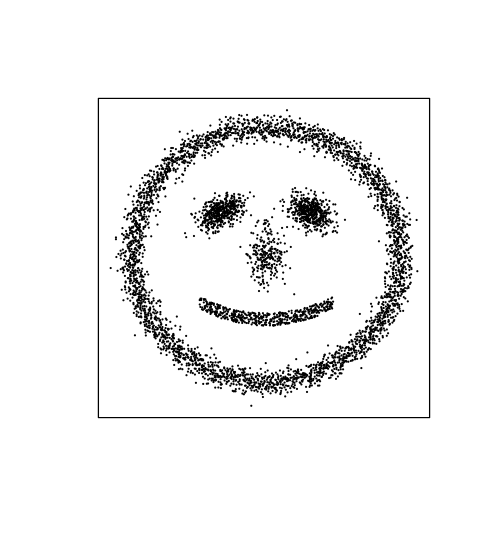

In [1]:
smiley=read.csv("../datasets/smiley2.csv", header = TRUE, sep = ",")
#
# extract columns for easy plotting
#
x=smiley[,1]
y=smiley[,2]
ndata=length(x)
#
# set window size
#
options(repr.plot.width=4, repr.plot.height=4.5)
#pdf("smiley2.pdf",width=4,height=4.5)
plot(x,y,cex=.05,axes=FALSE,frame.plot=TRUE,xlab="",ylab="")
#dev.off()

### random.colors(n) generates a palette of n random colors

In [2]:
random.colors=function(n){
    u=rep(0,n)
    for (j in 1:n){ u[j]=rgb(runif(1),runif(1),runif(1)) }
    u
    }

### set.my.colors(clust.assign,palette) produces a list of colors from the palette 

In [3]:
set.my.colors=function(clust.assign, from.palette){
    ncl=length(unique(clust.assign))
    ndata = length(clust.assign)
    pointcolors=rep(0,ndata) 
    for (j in 1:ncl){
        pointcolors[clust.assign==j]=from.palette[j]   
    }
    pointcolors
}

### set.random.colors(clust.assign) returns a list of colors for cluster assignments from a random palette

In [13]:
set.random.colors=function(clust.assign){
    the.palette=random.colors(length(unique(clust.assign)))
    set.my.colors(clust.assign, the.palette)
}

In [14]:
# install.packages("dbscan")

In [15]:
library(dbscan)

## Perform Clustering

In [18]:
cl=dbscan(smiley,eps=.2,minPts=10)
cl

DBSCAN clustering for 5249 objects.
Parameters: eps = 0.2, minPts = 10
The clustering contains 5 cluster(s) and 142 noise points.

   0    1    2    3    4    5 
 142 3418  478  488  500  223 

Available fields: cluster, eps, minPts

## Make color assignments and plot 

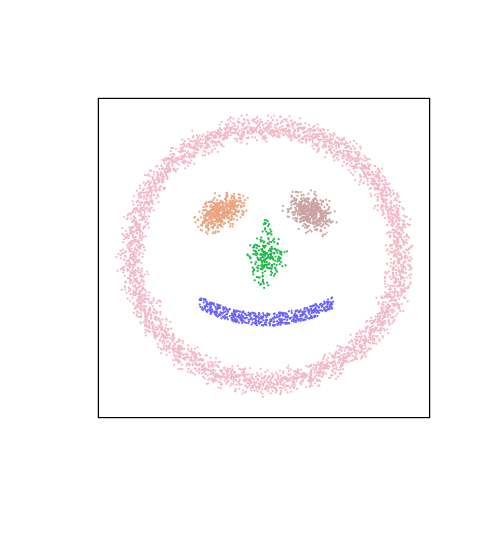

In [19]:
pointcolors=set.random.colors(cl$cl)
#pdf("clustered-smiley",width=5,height=5.5)
plot(x,y,cex=0.1,col=pointcolors,
       xlab="",ylab="",axes=FALSE,frame.plot=TRUE) 
#dev.off()

# Read and  plot the squiggles file

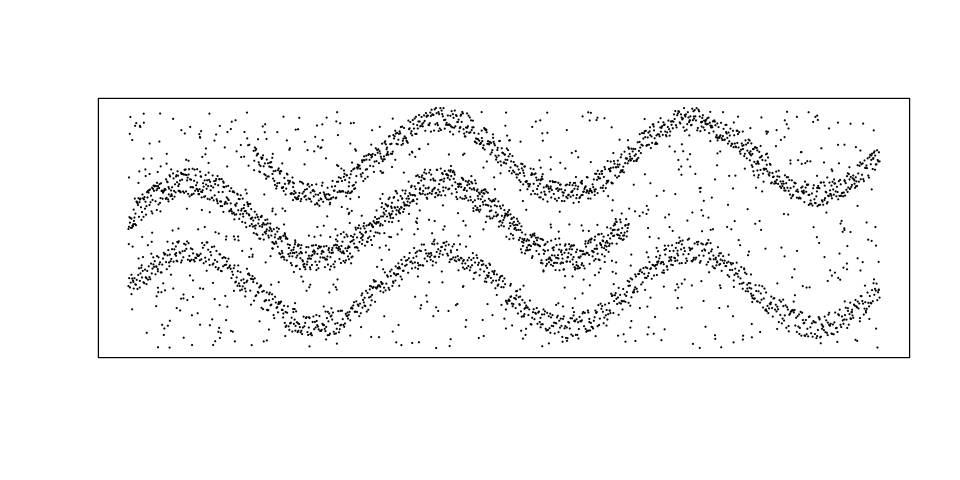

In [20]:
sq=read.csv("../datasets/squiggles.csv", header = TRUE, sep = ",")
x=sq[,1]
y=sq[,2]
ndata=length(x)
options(repr.plot.width=8, repr.plot.height=4)
#pdf("squigles.pdf",width=5,height=5)
plot(x,y,cex=.05,axes=FALSE,frame.plot=TRUE,xlab="",ylab="")
#dev.off()

## Do the clustering

In [21]:
cls=dbscan(sq,eps=.075,minPts=10)
cls

DBSCAN clustering for 4000 objects.
Parameters: eps = 0.075, minPts = 10
The clustering contains 3 cluster(s) and 467 noise points.

   0    1    2    3 
 467 1177 1196 1160 

Available fields: cluster, eps, minPts

## Make color assignments and Plot

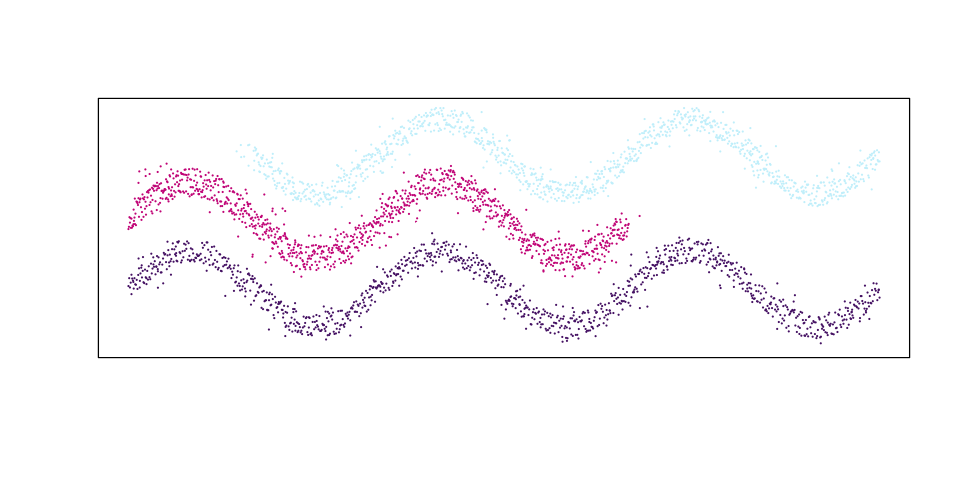

In [22]:
pointcolors=set.random.colors(cls$cl)
#pdf("dbscan-squiggles",width=8,height=4)
plot(x,y,cex=0.1,col=pointcolors,
       xlab="",ylab="",axes=FALSE,frame.plot=TRUE) 
#dev.off()

# Contrive interlocking half circles

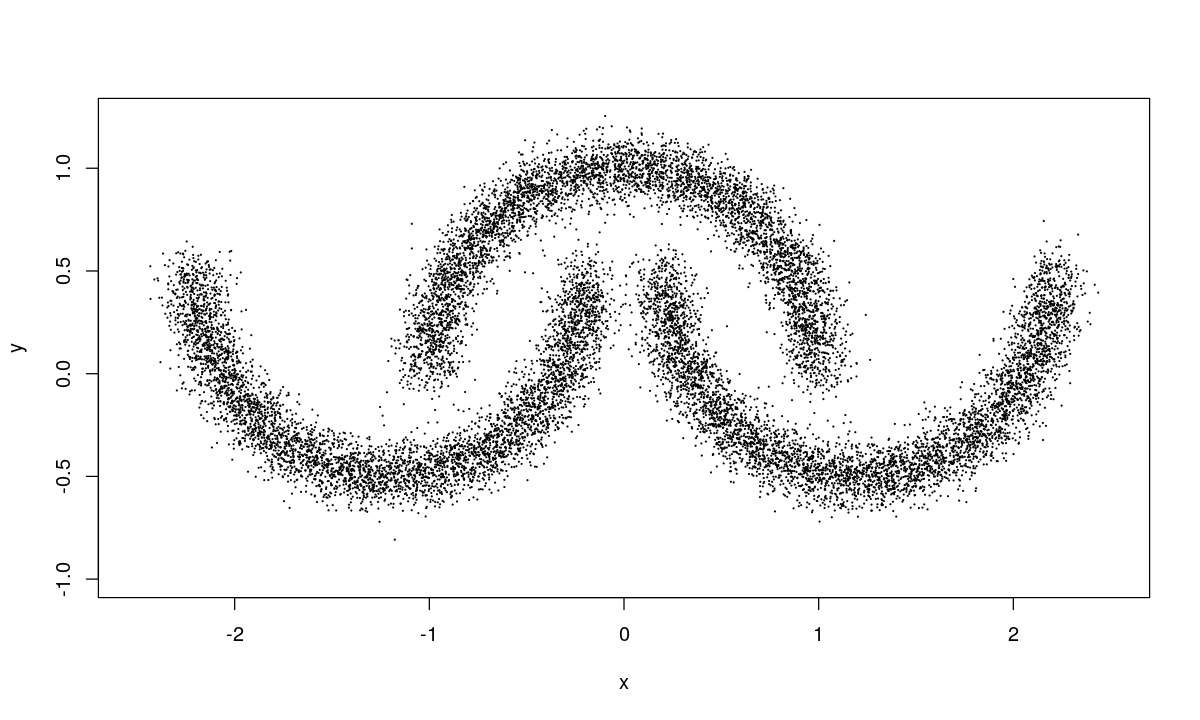

In [92]:
xvals=0; yvals=0; i=0
pvals=0; qvals=0; rvals=0; svals=0
npts=5000
for (z in seq(0,10,length.out=npts)){
    i=i+1
    xvals[i]=cos(z*pi/10)
    yvals[i]=sin(z*pi/10)
    
    pvals[i]=1.2+cos(z*pi/10)
    qvals[i]=.5-sin(z*pi/10)
    
    rvals[i]=-1.2-cos(z*pi/10)
    svals[i]=.5-sin(z*pi/10)

}

scatter=0.08

x=c(xvals,pvals,rvals)+rnorm(3*npts, mean = 0,sd=scatter)
y=c(yvals,qvals,svals)+rnorm(3*npts, mean = 0, sd =scatter)

options(repr.plot.width=10, repr.plot.height=6)

plot(x,y,cex=0.1,ylim=c(-1.,1.25),xlim=c(-2.5,2.5))


In [93]:
xy=data.frame(x,y)

In [94]:
head(xy,5)

x,y
1.0307041,-0.02313981
0.9566363,-0.13748492
0.8720432,0.06869085
0.9264674,0.01048137
1.1034718,0.02340427


In [96]:
xycls=dbscan(xy,eps=.05,minPts=10)
xycls

DBSCAN clustering for 15000 objects.
Parameters: eps = 0.05, minPts = 10
The clustering contains 3 cluster(s) and 263 noise points.

   0    1    2    3 
 263 4911 4915 4911 

Available fields: cluster, eps, minPts

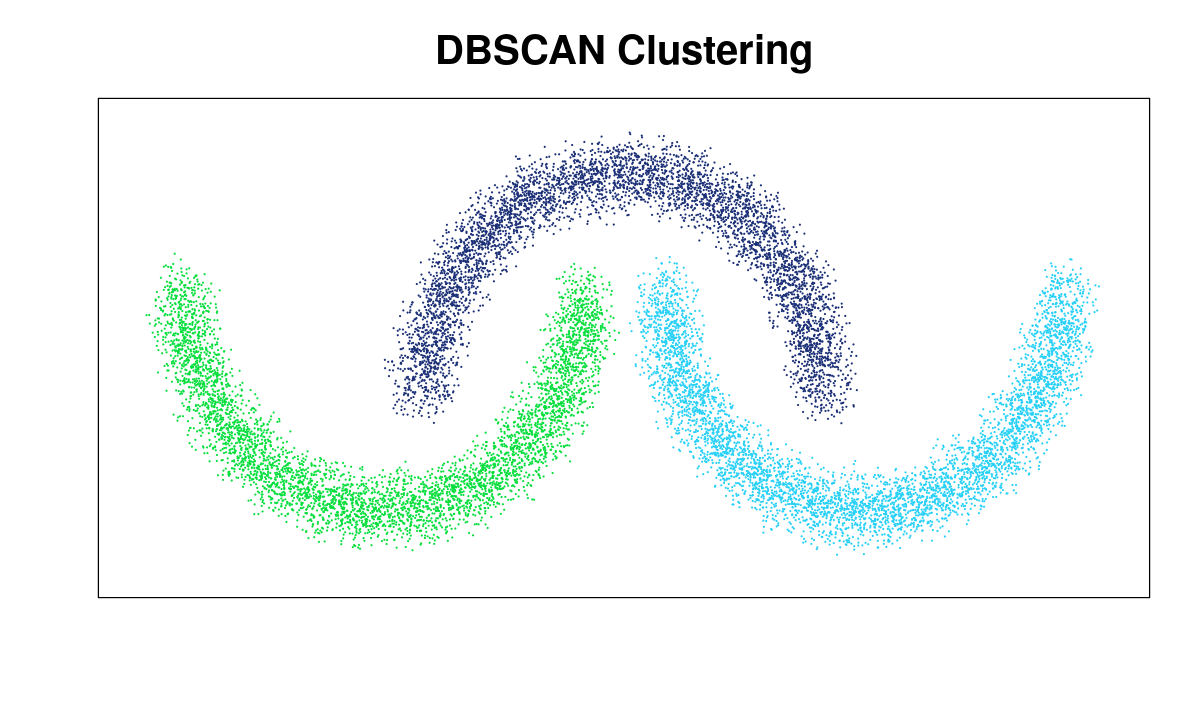

In [106]:
pointcolors=set.random.colors(xycls$cl)
plot(x,y,cex=0.1,col=pointcolors,
       xlab="",ylab="",axes=FALSE,frame.plot=TRUE,
    main="DBSCAN Clustering",cex.main=2)

In [100]:
kclus=kmeans(xy,3)

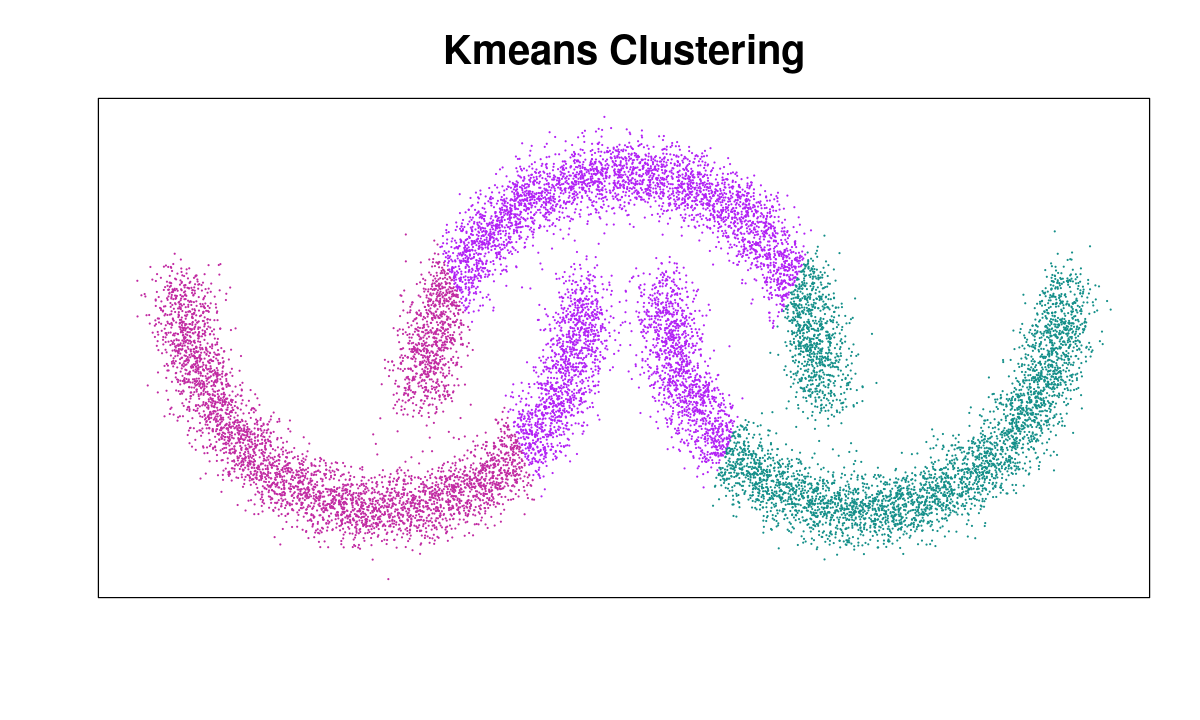

In [104]:
pointcolors=set.random.colors(kclus$cl)
plot(x,y,cex=0.1,col=pointcolors,
       xlab="",ylab="",axes=FALSE,frame.plot=TRUE,
     main="Kmeans Clustering", cex.main=2)